<a href="https://colab.research.google.com/github/ellenne/Regression/blob/master/10.%20WIP/Regression_Lesson02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Source:*<br/>
https://newonlinecourses.science.psu.edu/stat501/node/251/

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.utils import check_array
import warnings

In [0]:
# Definitions
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

In [10]:
skincancer_url = 'https://raw.githubusercontent.com/ellenne/Regression/master/05.%20In/skincancer.csv'
my_data = pd.read_csv(skincancer_url)
my_data.head()

,State,Lat,Mort,Ocean,Long
0,Alabama,33.000,219,1,87.000
1,Arizona,34.500,160,0,112.000
2,Arkansas,35.000,170,0,92.500
3,California,37.500,182,1,119.500
4,Colorado,39.000,149,0,105.500


In [11]:
model = smf.ols(formula = 'Mort ~ Lat', data = my_data)
fitted = model.fit()
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   Mort   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     99.80
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.31e-13
Time:                        11:46:39   Log-Likelihood:                -213.08
No. Observations:                  49   AIC:                             430.2
Df Residuals:                      47   BIC:                             433.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    389.1894     23.812     16.344      0.0

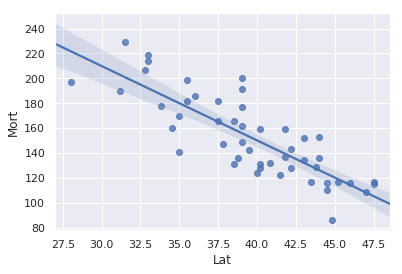

In [12]:
sns.set(color_codes=True)
ax = sns.regplot(x="Lat", y="Mort", data=my_data)

In [17]:
aov_table = sm.stats.anova_lm(fitted, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Lat,36464.200,1.000,99.797,0.000
Residual,17173.065,47.000,nan,nan


We are interested in understanding if there is a relationship between the population of all of the latidues and skin cancer mortality rates. <br/>
We want to know if $\beta_1$ is different from 0. We calculate the following statistics:<br/>
$b_1 \pm t_{(\alpha/2, n-2)} \times \left( \frac{\sqrt{MSE}}{\sqrt{\sum{(x_i - \bar{x_i})^2}}} \right)  $

<p>Looking at what Python gives us we can see that the predictor for `Lat` is -5.9776 (OLS Regression Result under coef). The estimated standard error for $b_1$ is 0.5984 (std err in the same section).<br/>
<p>By default, the test statistic is calculated assuming the user wants to test that the slope is 0. Dividing the estimated coefficient -5.9776 by the standard error 0.5984 we obtain the T statistic -9.99 (under t in the OLS).<br/>
  <p>The P-value is calculated assuming the alternative hypothesis is a "two-tailed, not-equal-to" hypothesis. Then it is calculated the probability that a t-random variable with n-2 = 47 degrees of freedom (see the aov_table below) would be larger than 9.99, and multiplying the probability by 2, Python reports that P is 0.000. This means that the P-value is less than 0.001 (the multiplication by 2 happens because it is a two-tailed test).<br/>
<p>Becuse the P-value is small (less than 0.001), we can reject the null hypothesis and conclude that $\beta_1$ does not equal 0. There is a sufficient evidence, at the $\alpha = 0.05$ level, to conclude that there is a linear relationship in the population between skin cancer mortality and latitude.<br/><br/>
 
Let's build now a 95% confidence interval for $\beta_1$


In [18]:
fitted.conf_int(0.05)   # 95% confidence interval

,0,1
Intercept,341.285,437.094
Lat,-7.181,-4.774


<p>We can be 95% confident that the population slope is between -7.2 and -4.8. That i, we can be 95% confident that for every additional one-degree increase in latitude, the mean skin cancer mortality rate decreases between 4.8 and 7.2 deaths per 10 million people.<br/>
  <p>Similar thing can be said for the intercept. In this case it is different from 0 therefore when x=0 the response it is different from 0. Not in all cases this scenario makes sense.<br/>
 
<p>  **Statistical inference conditions**<br/>
 The above confidence intervals for $\beta_0 and \beta_1$ can be used if the *LINE* assumptions hold - linearity, independence, normality and equal variance - 